In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns



In [2]:
calendar_df = pd.read_csv('./dataset/calendar.csv')
listing_df = pd.read_csv('./dataset/listings.csv')
reviews_df = pd.read_csv('./dataset/reviews.csv')

In [3]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
#check number of rows and columns
print(calendar_df.shape)
print(listing_df.shape)

(1393570, 4)
(3818, 92)


In [6]:
calendar_df['listing_id'].value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64

In [7]:
#check missing values in calender
calendar_df.isnull().sum()/calendar_df.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [8]:
#check missing values in calender
listing_df.isnull().sum()/calendar_df.shape[0]

id                                  0.00000
listing_url                         0.00000
scrape_id                           0.00000
last_scraped                        0.00000
name                                0.00000
                                     ...   
cancellation_policy                 0.00000
require_guest_profile_picture       0.00000
require_guest_phone_verification    0.00000
calculated_host_listings_count      0.00000
reviews_per_month                   0.00045
Length: 92, dtype: float64

In [9]:
#drop rows with no price, 
#this technique was used because the price column is a resulting field and cannot be gotten value for
calendar_df.dropna(subset=['price'],inplace=True)

In [10]:
#check missing values in listing df
np.sum((listing_df.isnull().sum()/listing_df.shape[0])>0.50)

4

In [11]:
#drop rows with over  50% of its data missing
listing_df.dropna(axis=1,thresh=1900, inplace= True)

In [12]:
print(calendar_df.shape)
print(listing_df.shape)

(934542, 4)
(3818, 88)


In [13]:
#### make a list of column names that are not needed
to_drop= ['listing_url','scrape_id','last_scraped','experiences_offered','jurisdiction_names',
            'latitude','longitude','weekly_price','availability_30','availability_60','availability_90',
          'availability_365','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
         'review_scores_location','jurisdiction_names','neighbourhood_group_cleansed','name','summary','space','description'
         ,'xl_picture_url','host_id','host_url','host_name','host_since','neighbourhood','reviews_per_month',
       'host_location', 'host_about', 'host_response_time','neighborhood_overview','cleaning_fee',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','first_review','last_review',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','review_scores_rating','review_scores_value',
       'host_listings_count', 'host_total_listings_count','review_scores_accuracy','review_scores_value',
       'host_verifications', 'host_has_profile_pic', 'zipcode','market','smart_location','thumbnail_url','medium_url',
        'picture_url']
listing_df.drop(to_drop,axis=1, inplace=True)

In [14]:
listing_df.isnull().sum()

id                                     0
notes                               1606
transit                              934
host_identity_verified                 2
street                                 0
neighbourhood_cleansed                 0
city                                   0
state                                  0
country_code                           0
country                                0
is_location_exact                      0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type                               0
amenities                              0
price                                  0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated

In [15]:
calendar_df['price'][0]

'$85.00'

In [16]:
fill_mean = lambda col:col.fillna(col.mean())
fill_mode = lambda col:col.fillna(col.mode())

In [17]:
clean_price = lambda col: float(str(col).replace('$','').replace(',',''))

#convert price to float ans strip the dollar signcalen
calendar_df['price']= calendar_df['price'].apply(clean_price)
listing_df['price'] =listing_df['price'].apply(clean_price)
listing_df['extra_people'] = listing_df['extra_people'].apply(clean_price)

In [18]:
#fill the Nans 
listing_df['notes'].fillna('', inplace= True)
listing_df['transit'].fillna('', inplace= True)
listing_df['host_identity_verified'].fillna(listing_df['host_identity_verified'].mode()[0], inplace=True)
listing_df['bathrooms'].fillna(listing_df['bathrooms'].mode()[0],inplace=True)
listing_df['bedrooms'].fillna(listing_df['bedrooms'].mode()[0],inplace=True)
listing_df['property_type'].fillna(listing_df['property_type'].mode()[0],inplace=True)

In [19]:
#its just one bed missing, check for the index
print(listing_df['beds'][listing_df['beds'].isnull()])
#bedrooms are suppose to be equal to beds , check true that is
print ((listing_df['bedrooms']==listing_df['beds']).sum())
#over 60% of berooms have beds)
# therefore number of bedrooms should be equal to number of beds
listing_df['beds'][1961]=listing_df['bedrooms'][1961]

1961   NaN
Name: beds, dtype: float64
2453


<ipython-input-19-f6585e837f0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_df['beds'][1961]=listing_df['bedrooms'][1961]


In [21]:
#bedrooms are suppose to be equal to beds , check true that is
(listing_df['bedrooms']==listing_df['beds']).sum()
#over 60% of berooms have beds

2453

In [22]:
listing_df['beds'][1961]=listing_df['bedrooms'][1961]

<ipython-input-22-941eb36add92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_df['beds'][1961]=listing_df['bedrooms'][1961]


In [20]:

#converting date from the calendar into month 
calendar_df['month'] = calendar_df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)

#converting date from the calendar into year and drop the date column
calendar_df['year'] = calendar_df.apply(lambda row: int(row['date'].split('-')[0]), axis=1)

calendar_df['day'] = calendar_df.apply(lambda row: int(row['date'].split('-')[2]), axis=1)
calendar_df.drop('date', axis = 1, inplace = True)

In [21]:
listing_df.rename(columns={'id':'listing_id'}, inplace=True)
# merge listing_df and calender_df by listing_id
df = pd.merge(calendar_df, listing_df, on='listing_id')

In [22]:
#drop more columns
drop_more = ['street', 'neighbourhood_cleansed','country_code','country','notes',
             'calendar_updated','city','available','state','requires_license', 'has_availability','transit',
             'calendar_last_scraped', 'requires_license']
df.drop(drop_more, axis = 1, inplace=True)

In [23]:
#drop the price_x
# price x is the genral price of each listing, while price y is the calendar price of each listing at 
# particular times , therefore we hold on to price_y because it is more particular.
df.drop('price_y', axis=1,inplace=True)

In [24]:
#rename price_x to price
df.rename(columns={'price_x': "price"},inplace = True)

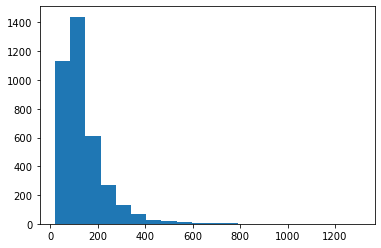

In [25]:
# visualize
#get the average price for each listing
mean_price_for_listing = df.groupby('listing_id').mean()['price']
plt.hist(mean_price_for_listing, bins=20);
#these shws most of the prices are between $50-$150

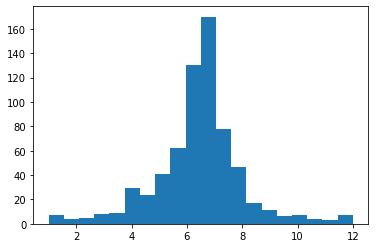

In [26]:
#get the average number of reviews per year
mean_price_per_year = df.groupby('price').mean()['month']
plt.hist(mean_price_per_year, bins=20);
#this shows the prices are high btween june and july

In [27]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',
                                                                 drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [28]:
# Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols = cat_df.columns
new_df = create_dummy_df(df, cat_cols, False)

In [29]:
df.select_dtypes(include=['object']).columns

Index(['host_identity_verified', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'amenities', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [31]:
#check if there are no missing values in the new_df
print(new_df.isnull().sum().sum())
print(new_df.shape)

0
(934542, 3250)


In [32]:
x = new_df.drop('price',axis =1)
Y = new_df['price']
x_train,x_test,y_train,y_test =train_test_split(x,Y,random_state = 42,test_size = .3)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(654179, 3249)
(280363, 3249)
(654179,)
(280363,)


In [ ]:
 #instatiate mode
lm_model = LinearRegression(normalize =True)
lm_model.fit(x_train,y_train)

In [ ]:
#Predict using your model
y_test_preds = lm_model.predict(x_test)
y_train_preds = lm_model.predict(x_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)